In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **1. Data Preparation:**

In [4]:
heart = pd.read_excel('/content/heart_disease.xlsx',sheet_name='Heart_disease')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


# **Details About The Dataset**

1. **age**: The age of the patient in years.

2. **sex**: The gender of the patient.
   - 1 = male
   - 0 = female

3. **cp (chest pain type)**: Describes the type of chest pain experienced by the patient.
   - 0 = Typical angina (chest pain related to decreased blood supply to the heart)
   - 1 = Atypical angina (chest pain not related to heart)
   - 2 = Non-anginal pain (chest pain not related to the heart)
   - 3 = Asymptomatic (no chest pain)

4. **trestbps (resting blood pressure)**: The patient’s resting blood pressure (in mm Hg) upon hospital admission.

5. **chol (serum cholesterol)**: The patient’s serum cholesterol level in mg/dL.

6. **fbs (fasting blood sugar)**: Indicates whether the patient's fasting blood sugar is higher than 120 mg/dL.
   - 1 = True
   - 0 = False

7. **restecg (resting electrocardiographic results)**: The results of the patient’s resting electrocardiogram.
   - 0 = Normal
   - 1 = Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - 2 = Showing probable or definite left ventricular hypertrophy by Estes' criteria

8. **thalch (maximum heart rate achieved)**: The maximum heart rate achieved during the stress test.

9. **exang (exercise-induced angina)**: Indicates whether the patient experiences angina (chest pain) during exercise.
   - 1 = Yes
   - 0 = No

10. **oldpeak**: ST depression induced by exercise relative to rest, which can indicate the severity of heart disease.

11. **slope (slope of the peak exercise ST segment)**: Describes the slope of the peak exercise ST segment.
    - 0 = Upsloping (better heart condition)
    - 1 = Flat (indicative of possible heart disease)
    - 2 = Downsloping (worse heart condition)

12. **thal (thalassemia)**: Refers to a blood disorder, often a marker used in the dataset.
    - 1 = Fixed defect (no blood flow in some part of the heart)
    - 2 = Normal
    - 3 = Reversible defect (a blood flow issue that can be fixed)

13. **num (target variable)**: The diagnosis of heart disease, often represented as an integer.
    - 0 = No heart disease
    - 1, 2, 3, 4 = Various levels of heart disease severity, with 1 being mild and 4 being the most severe.


# **2. Exploratory Data Analysis (EDA):**

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
heart.isna().mean()*100

,0
age,0.000000
sex,0.000000
cp,0.000000
trestbps,0.000000
chol,0.000000
fbs,0.000000
restecg,0.000000
thalch,0.000000
exang,0.000000
oldpeak,6.828194


In [7]:
heart['oldpeak'] = heart['oldpeak'].fillna(heart['oldpeak'].mean())
heart.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [8]:
heart[heart.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [9]:
heart[(heart['age']==58) & (heart['sex']== 'Male') & (heart['cp']== 'non-anginal') & (heart['trestbps']== 150) & (heart['chol']== 219)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
764,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [10]:
heart = heart.drop_duplicates()
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [11]:
heart.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,53.787211,133.412348,201.465270,135.976847,0.892236,1.007718
std,9.162016,20.405432,112.158285,26.813075,1.055993,1.144594
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.500000,120.000000,176.500000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


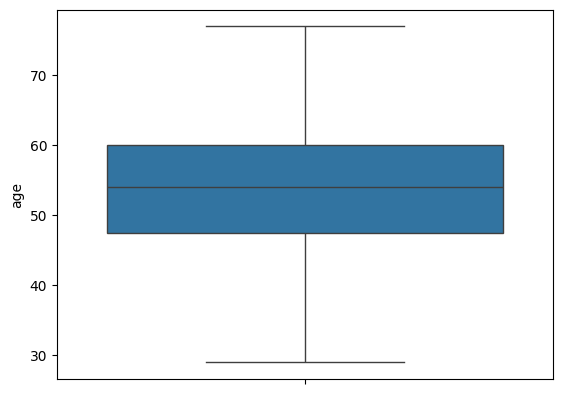

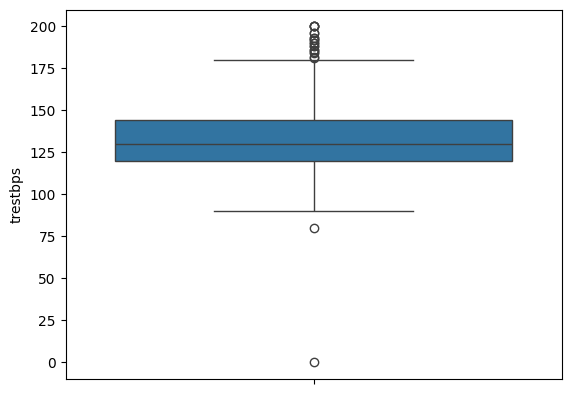

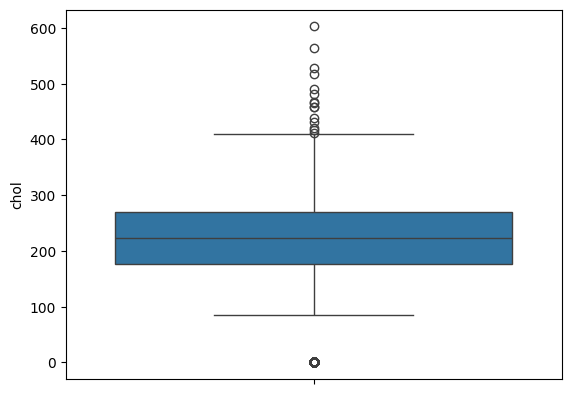

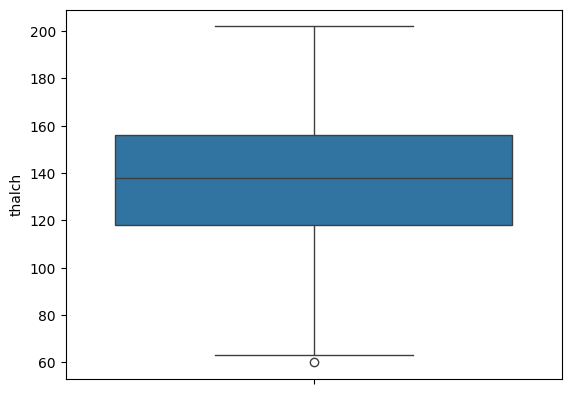

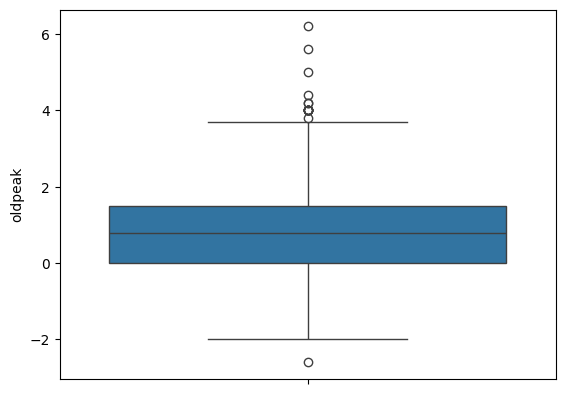

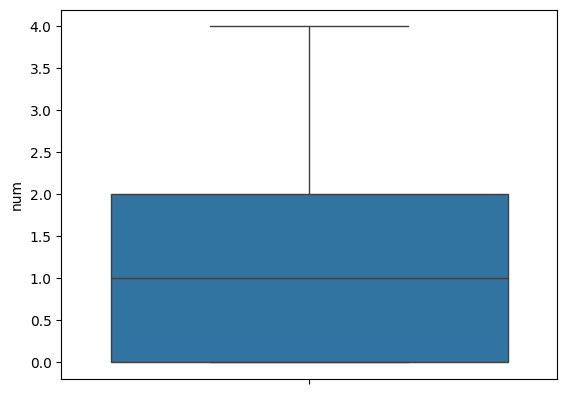

In [12]:
for i in heart.describe().columns:
  sns.boxplot(data=heart[i])
  plt.show()

In [13]:
outlier_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']

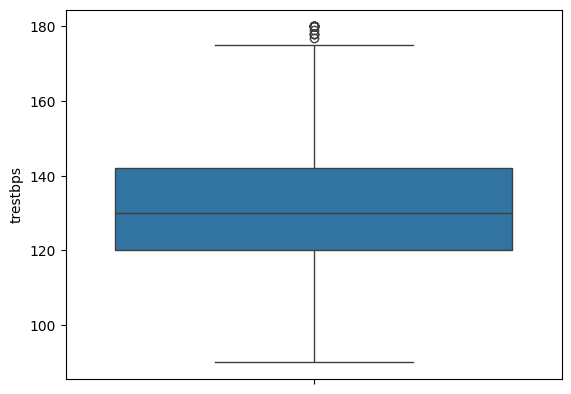

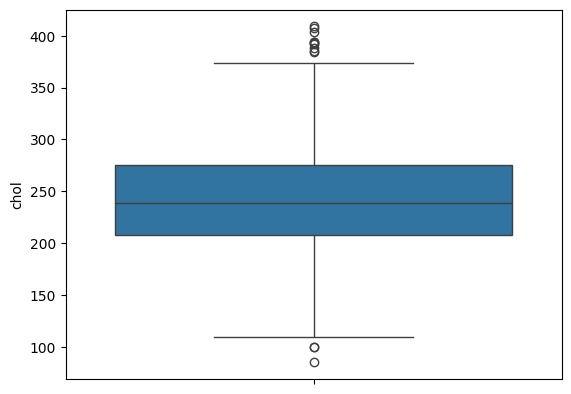

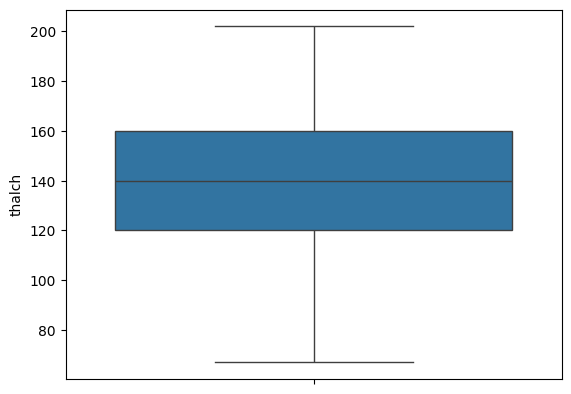

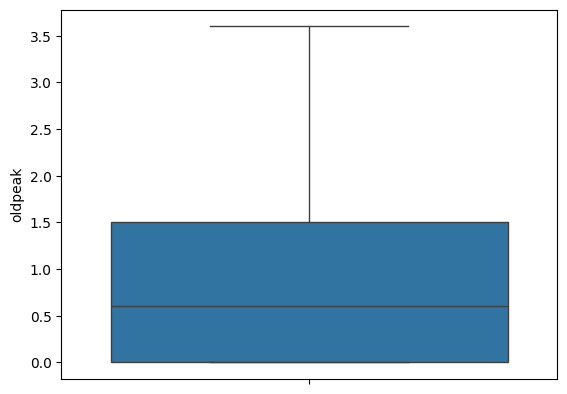

In [14]:
for i in outlier_columns:
    Q1 = heart[i].quantile(0.25)
    Q3 = heart[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    heart = heart[~((heart[i] < lower_limit) | (heart[i] > upper_limit))]
    sns.boxplot(data=heart[i])
    plt.show()

In [15]:
heart.shape

(692, 13)

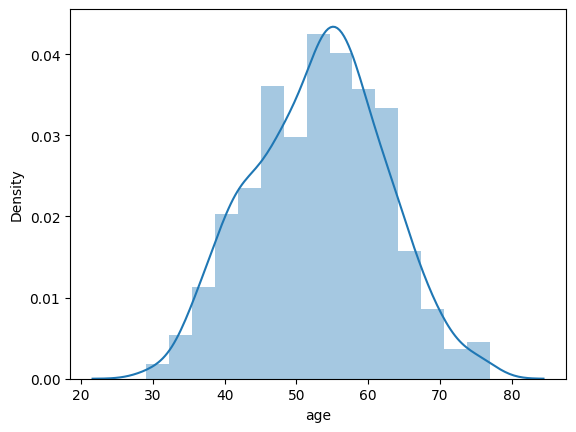

In [16]:
sns.distplot(heart['age'],kde=True,bins=15,hist=True)
plt.show()

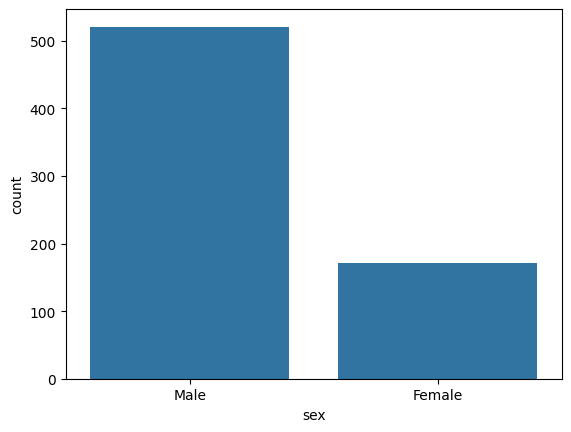

In [18]:
sns.countplot(data=heart,x='sex')
plt.show()

In [21]:
import plotly.express as px
data = heart.groupby('sex')['num'].value_counts().reset_index(name='count')
fig = px.bar(data, x='sex', y='count', color='num', barmode='group',template='plotly_dark')
fig.update_layout(title='Heart Disease Count by Sex',
                  title_x=0.5,
                  xaxis_title='Sex',
                  yaxis_title='Count',
                  legend_title='Heart Disease')
fig.show()

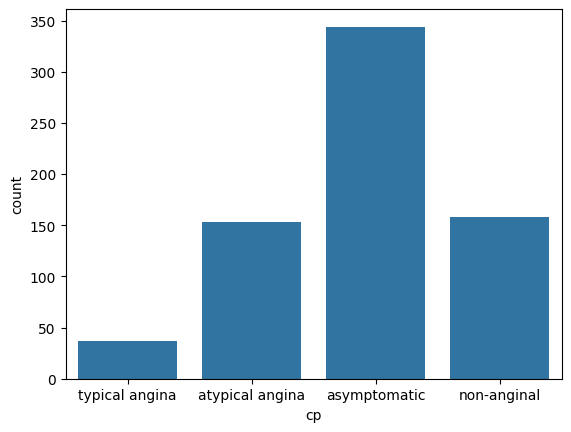

In [22]:
sns.countplot(data=heart,x='cp')
plt.show()

In [23]:
data = heart.groupby('cp')['num'].value_counts().reset_index(name='count')
fig = px.bar(data, x='cp', y='count', color='num', barmode='group',template='plotly_dark')
fig.update_layout(title='Heart Disease Count by Chest Pain Type',
                  title_x=0.5,
                  xaxis_title='Chest Pain Type',
                  yaxis_title='Count',
                  legend_title='Heart Disease')
fig.show()

In [29]:
fig = px.pie(heart,names='cp',title='Fasting Blood Sugar',template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label',textfont_color='black')
fig.update_layout(title_x=0.5)
fig.show()

In [40]:
fig = px.histogram(heart,x='trestbps',template='plotly_dark',text_auto=True)
fig.update_traces(marker_line_width=1.5, marker_line_color='white')
fig.update_layout(title='Distribution of resting blood pressure',
                  title_x=0.5)
fig.show()

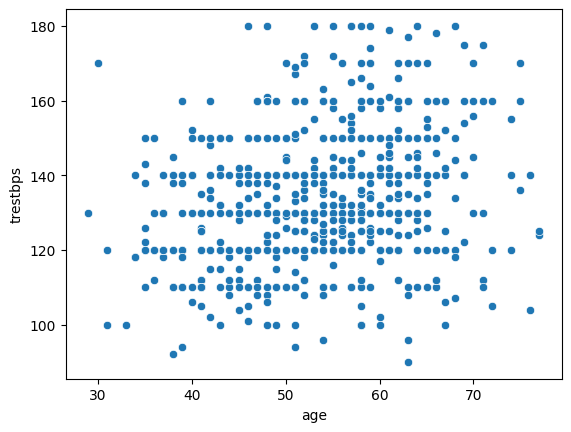

In [32]:
sns.scatterplot(data=heart,x='age',y='trestbps')
plt.show()

In [38]:
fig = px.histogram(heart,x='chol',template='plotly_dark',text_auto=True,nbins=25)
fig.update_traces(marker_line_width=1.5, marker_line_color='white')
fig.update_layout(title='Distribution of serum cholesterol',
                  title_x=0.5)
fig.show()

In [44]:
px.scatter(heart,x='chol',y='age',color='trestbps',template='plotly_dark')

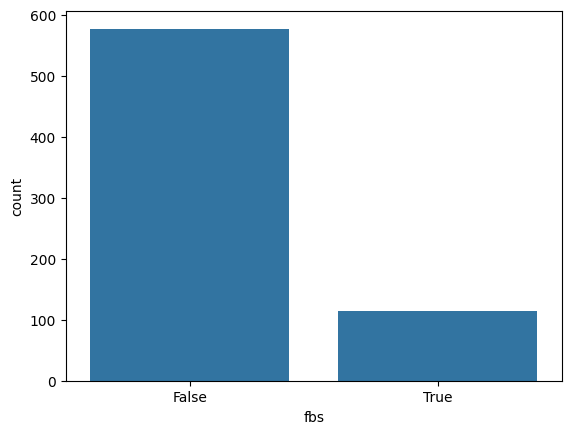

In [45]:
sns.countplot(data=heart,x='fbs')
plt.show()

In [46]:
data = heart.groupby('fbs')['num'].value_counts().reset_index(name='count')
fig = px.bar(data, x='fbs', y='count', color='num', barmode='group',template='plotly_dark')
fig.update_layout(title='Heart Disease Count by Fasting Blood Sugar',
                  title_x=0.5,
                  xaxis_title='Fasting Blood Sugar',
                  yaxis_title='Count',
                  legend_title='Heart Disease')
fig.show()

In [54]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       692 non-null    int64  
 1   sex       692 non-null    object 
 2   cp        692 non-null    object 
 3   trestbps  692 non-null    int64  
 4   chol      692 non-null    int64  
 5   fbs       692 non-null    bool   
 6   restecg   692 non-null    object 
 7   thalch    692 non-null    int64  
 8   exang     692 non-null    int64  
 9   oldpeak   692 non-null    float64
 10  slope     692 non-null    object 
 11  thal      692 non-null    object 
 12  num       692 non-null    int64  
dtypes: bool(1), float64(1), int64(6), object(5)
memory usage: 71.0+ KB


In [56]:
fig = px.histogram(heart,x='thalch',nbins=15,template='plotly_dark',text_auto=True)
fig.update_traces(marker_line_width=1.5, marker_line_color='white')
fig.update_layout(title='Distribution of maximum heart rate achieved',
                  title_x=0.5)
fig.show()

In [59]:
px.scatter(heart,x='thalch',y='age',color='chol',template='plotly_dark')

In [65]:
data = heart.groupby('exang')['num'].value_counts().reset_index(name='count')
fig = px.bar(data, x='exang', y='count', color='num',template='plotly_dark',text_auto=True)
fig.update_layout(title='Exercise-Induced Angina',
                  title_x=0.5)
fig.show()

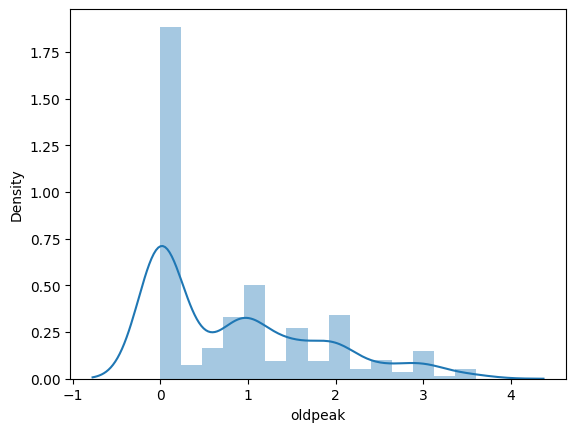

In [66]:
sns.distplot(heart['oldpeak'],kde=True,bins=15,hist=True)
plt.show()

In [69]:
px.scatter(heart,x='age',y='chol',color='oldpeak',template='plotly_dark')

In [73]:
data = heart['slope'].value_counts().reset_index()
fig = px.bar(data, x='slope', y='count',color='slope',template='plotly_dark',text_auto=True)
fig.update_layout(title='Distribution of slope of the peak exercise ST segment',
                  title_x=0.5)
fig.show()

In [70]:
data = heart.groupby('slope')['num'].value_counts().reset_index(name='count')
fig = px.bar(data, x='slope', y='count', color='num',barmode='group',template='plotly_dark')
fig.update_layout(title='Heart Disease Count by Slope',
                  title_x=0.5,
                  xaxis_title='Slope',
                  yaxis_title='Count',
                  legend_title='Heart Disease')
fig.show()

In [75]:
data = heart['thal'].value_counts().reset_index()
fig = px.bar(data, x='thal', y='count',color='thal',template='plotly_dark',text_auto=True)
fig.update_layout(title='Distribution of thalassemia',
                  title_x=0.5)
fig.show()

In [76]:
data = heart.groupby('thal')['num'].value_counts().reset_index(name='count')
fig = px.bar(data, x='thal', y='count', color='num',barmode='group',template='plotly_dark')
fig.update_layout(title='Heart Disease Count by Thalassemia',
                  title_x=0.5,
                  xaxis_title='Thalassemia',
                  yaxis_title='Count',
                  legend_title='Heart Disease')
fig.show()

In [77]:
data = heart['num'].value_counts().reset_index()
fig = px.bar(data, x='num', y='count',color='num',template='plotly_dark',text_auto=True)
fig.update_layout(title='Distribution of target variable',
                  title_x=0.5)
fig.show()

In [79]:
fig = px.pie(heart,names='num',title='Level of Heart Desaese',template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label',textfont_color='black')
fig.update_layout(title_x=0.5)
fig.show()

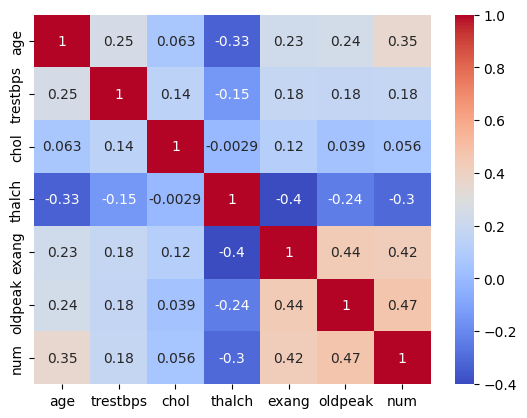

In [80]:
corr = heart[heart.describe().columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# **3. Feature Engineering:**

In [81]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [82]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [83]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [84]:
heart['sex'] = label_encoder.fit_transform(heart['sex'])
heart['cp'] = label_encoder.fit_transform(heart['cp'])
heart['fbs'] = label_encoder.fit_transform(heart['fbs'])
heart['restecg'] = label_encoder.fit_transform(heart['restecg'])
heart['slope'] = label_encoder.fit_transform(heart['slope'])
heart['thal'] = label_encoder.fit_transform(heart['thal'])
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


In [85]:
heart['exang'] = heart['exang'].astype(bool)
heart['exang'] = heart['exang'].astype(int)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


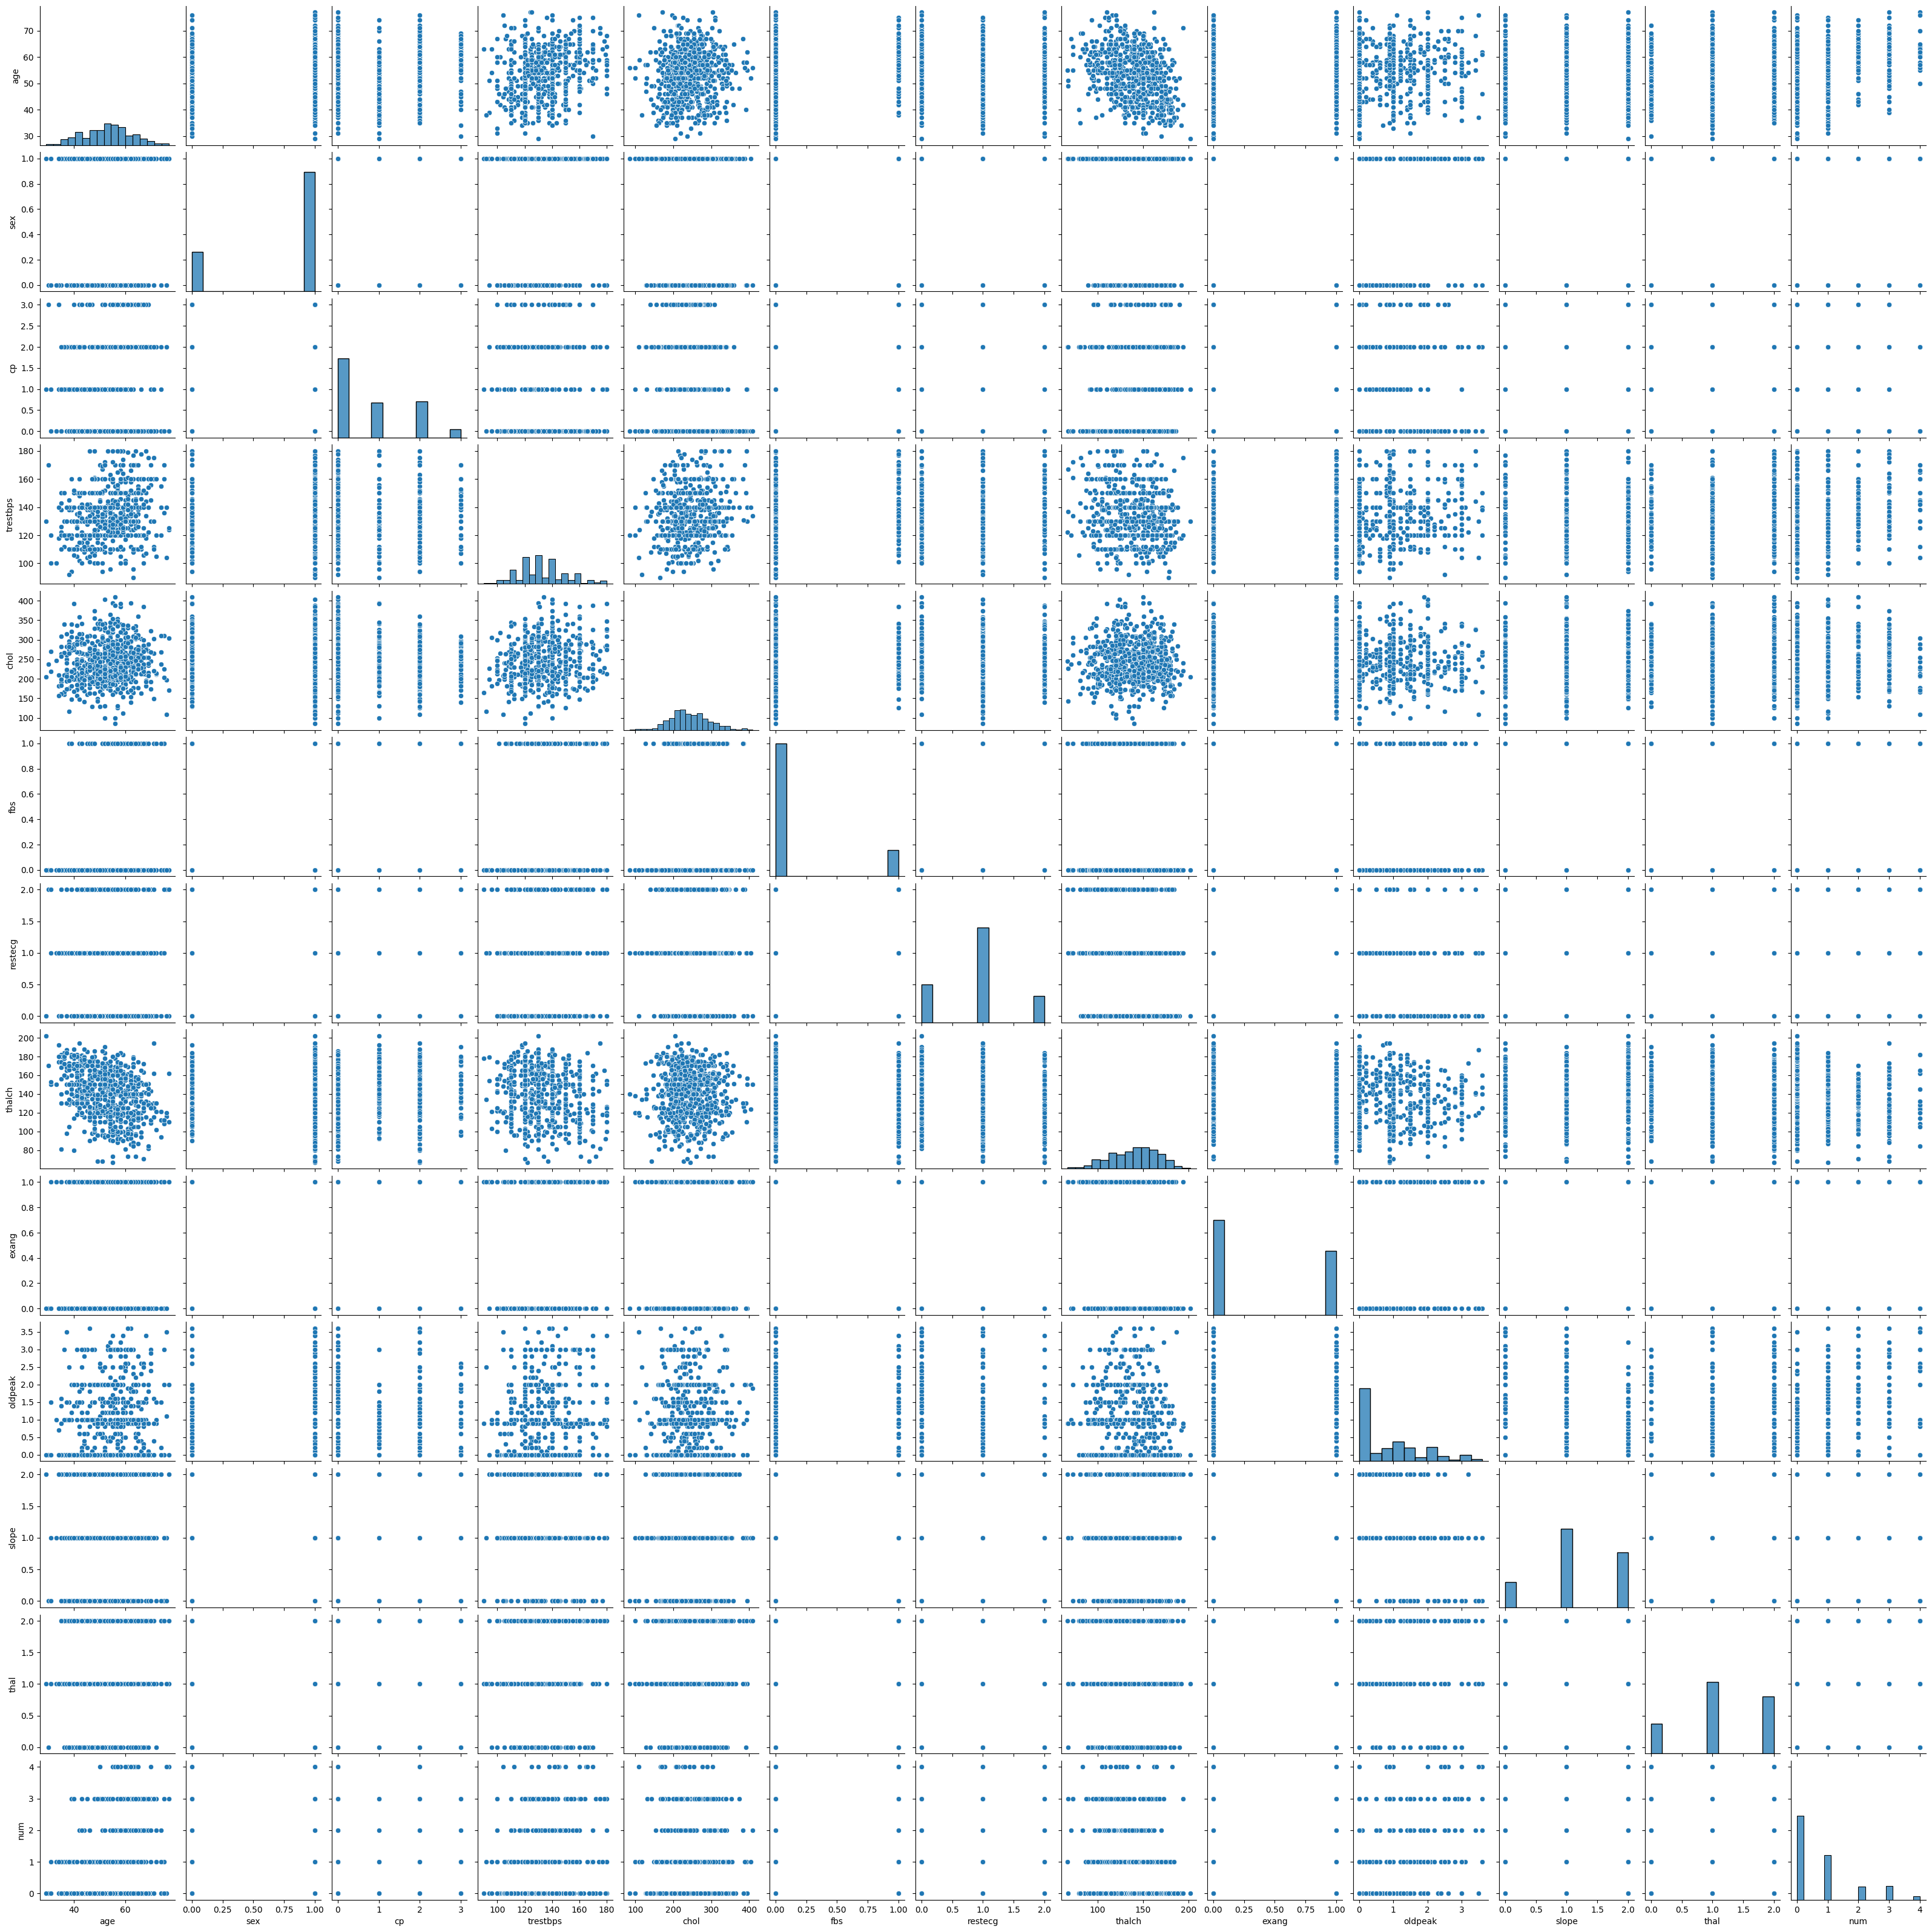

In [87]:
sns.pairplot(heart)
plt.show()

# **4. Decision Tree Classification:**

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

In [89]:
X = heart.drop('num', axis=1)
y = heart['num']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
Decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
Decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [92]:
print('Train Accuracy:', Decision_tree.score(X_train, y_train))
print('Test Accuracy:', Decision_tree.score(X_test, y_test))

Train Accuracy: 0.6943942133815552
Test Accuracy: 0.5755395683453237


In [93]:
y_pred = Decision_tree.predict(X_test)
y_pred[:5]

array([1, 1, 0, 0, 0])

In [94]:
print(classification_report(y_test, Decision_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        82
           1       0.31      0.43      0.36        30
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         3

    accuracy                           0.58       139
   macro avg       0.22      0.25      0.23       139
weighted avg       0.52      0.58      0.55       139



In [95]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[67, 14,  1,  0,  0],
       [11, 13,  1,  5,  0],
       [ 4,  6,  0,  0,  0],
       [ 5,  8,  1,  0,  0],
       [ 0,  1,  0,  2,  0]])

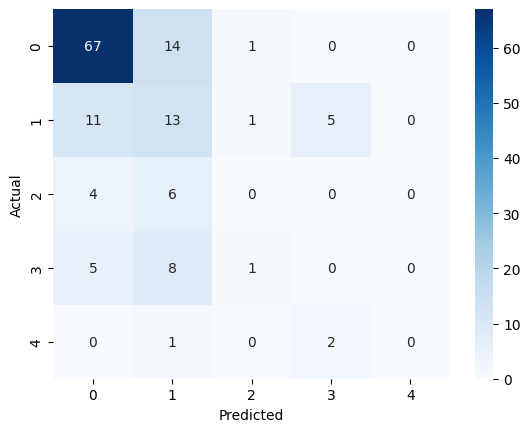

In [96]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [97]:
y_pred_proba = Decision_tree.predict_proba(X_test) # Get predicted probabilities
print('ROC Score is:', roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))

ROC Score is: 0.7119460577175276


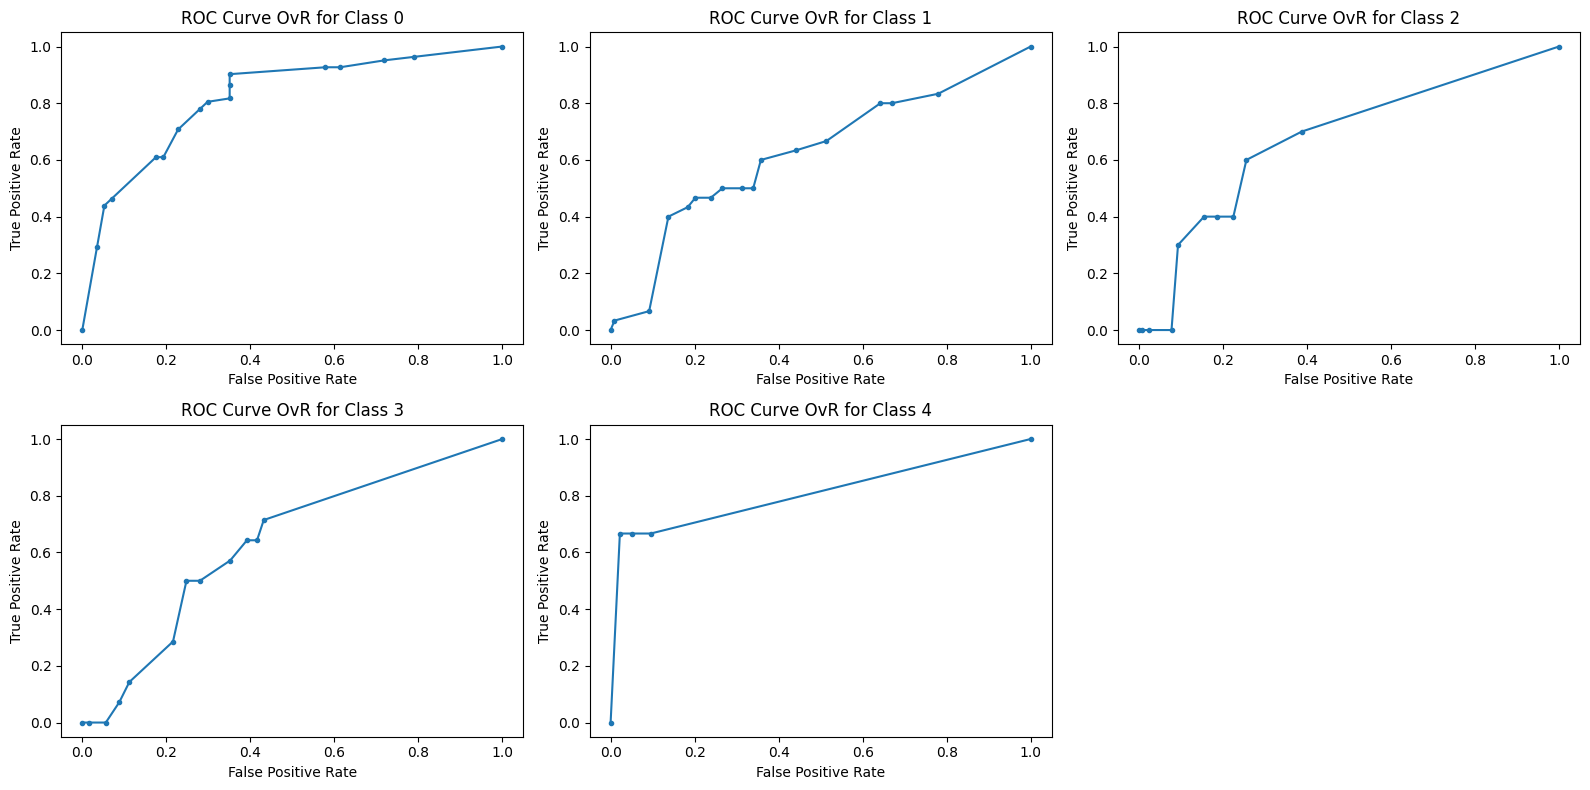

ROC AUC OvR for class 0: 0.82
ROC AUC OvR for class 1: 0.63
ROC AUC OvR for class 2: 0.67
ROC AUC OvR for class 3: 0.63
ROC AUC OvR for class 4: 0.81


In [98]:
plt.figure(figsize=(16, 8))
classes = Decision_tree.classes_  # Assuming this gives the list of class labels
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]

    # Prepares an auxiliary dataframe to help with the ROC curve
    df_aux = X_test.copy()  # X_test is your test data (features)
    df_aux['class'] = [1 if y == c else 0 for y in y_test]  # y_test is your test data (true labels)
    df_aux['prob'] = y_pred_proba[:, i]  # y_proba is the predicted probabilities from the model

    # Calculates the ROC Coordinates and plots the ROC Curves
    fpr, tpr, _ = roc_curve(df_aux['class'], df_aux['prob'])
    ax = plt.subplot(2, 3, i+1)
    ax.plot(fpr, tpr, marker='.')
    ax.set_title(f"ROC Curve OvR for Class {c}")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")

    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

plt.tight_layout()
plt.show()

# Print ROC AUC scores
for c in roc_auc_ovr:
    print(f"ROC AUC OvR for class {c}: {roc_auc_ovr[c]:.2f}")

# **5. Hyperparameter Tuning:**

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [None, 5,10, 20, 30, 40, 50],  # Maximum depth of the tree
}

In [101]:
dt = DecisionTreeClassifier(random_state=42)

In [102]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 30, 40, 50]},
             scoring='accuracy', verbose=1)

In [103]:
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 5}


# **6. Model Evaluation and Analysis:**

In [104]:
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83        82
           1       0.38      0.63      0.48        30
           2       0.33      0.10      0.15        10
           3       0.17      0.07      0.10        14
           4       0.00      0.00      0.00         3

    accuracy                           0.63       139
   macro avg       0.35      0.32      0.31       139
weighted avg       0.62      0.63      0.61       139



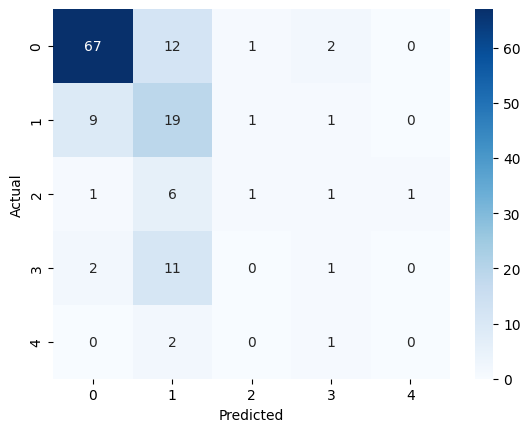

In [105]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [106]:
y_pred_proba = best_model.predict_proba(X_test) # Get predicted probabilities
print('ROC Score is:', roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))

ROC Score is: 0.7764139147416053


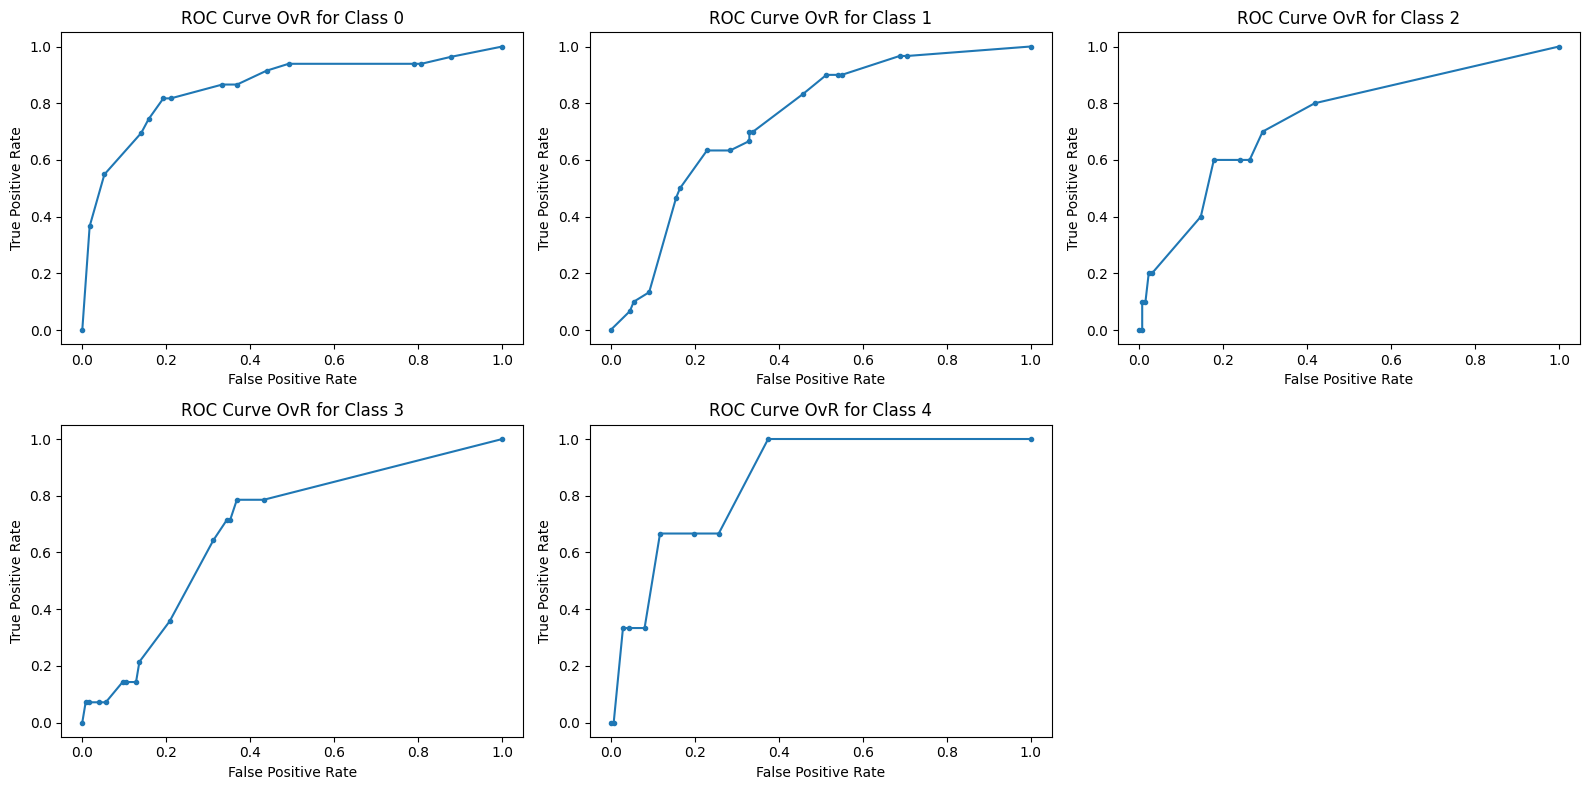

ROC AUC OvR for class 0: 0.86
ROC AUC OvR for class 1: 0.74
ROC AUC OvR for class 2: 0.74
ROC AUC OvR for class 3: 0.68
ROC AUC OvR for class 4: 0.86


In [107]:
plt.figure(figsize=(16, 8))
classes = best_model.classes_  # Assuming this gives the list of class labels
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]

    # Prepares an auxiliary dataframe to help with the ROC curve
    df_aux = X_test.copy()  # X_test is your test data (features)
    df_aux['class'] = [1 if y == c else 0 for y in y_test]  # y_test is your test data (true labels)
    df_aux['prob'] = y_pred_proba[:, i]  # y_proba is the predicted probabilities from the model

    # Calculates the ROC Coordinates and plots the ROC Curves
    fpr, tpr, _ = roc_curve(df_aux['class'], df_aux['prob'])
    ax = plt.subplot(2, 3, i+1)
    ax.plot(fpr, tpr, marker='.')
    ax.set_title(f"ROC Curve OvR for Class {c}")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")

    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

plt.tight_layout()
plt.show()

# Print ROC AUC scores
for c in roc_auc_ovr:
    print(f"ROC AUC OvR for class {c}: {roc_auc_ovr[c]:.2f}")

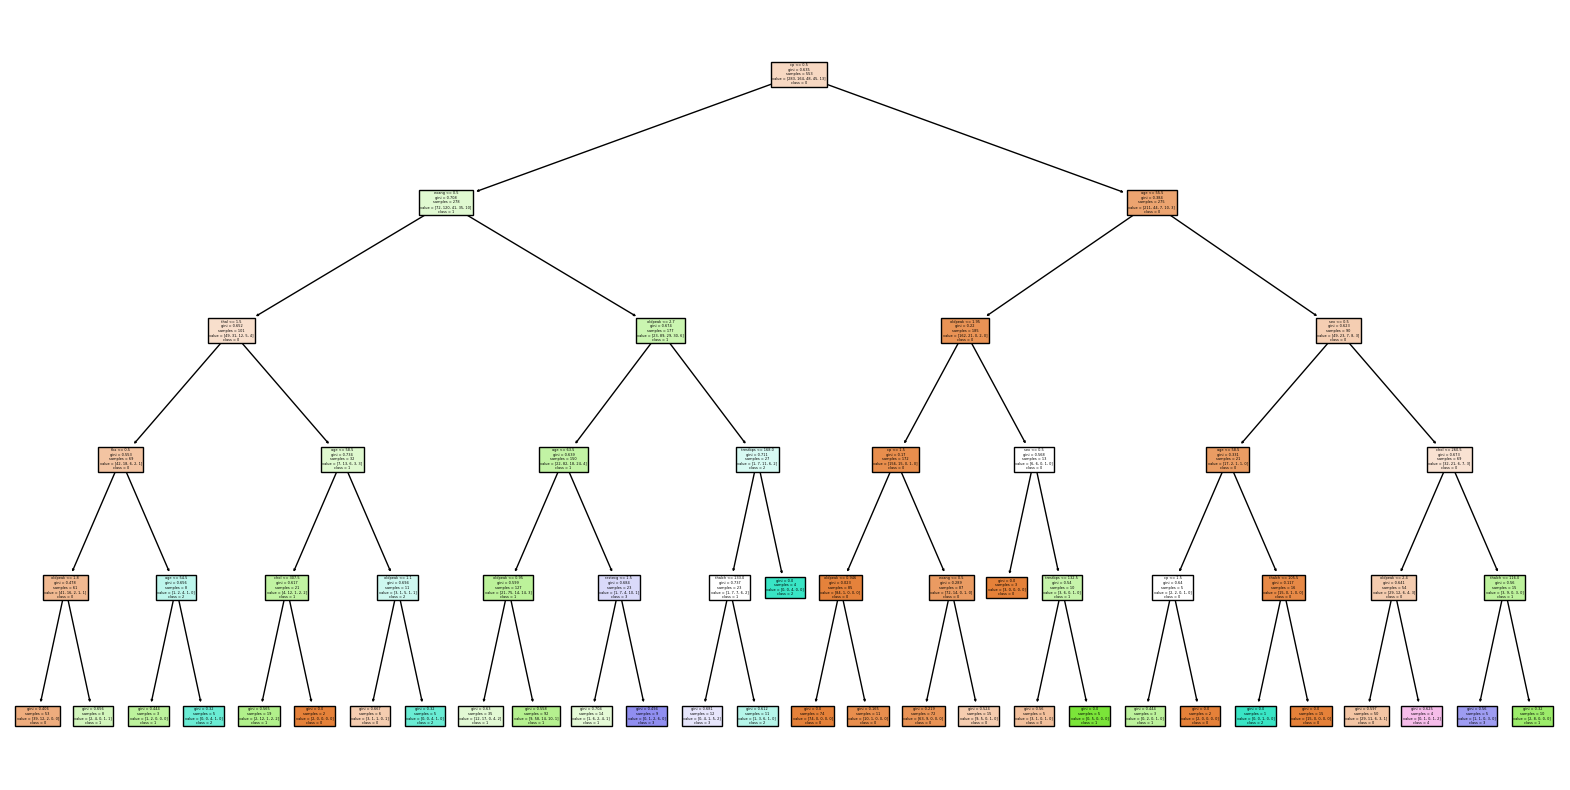

In [108]:
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=[str(c) for c in best_model.classes_])
plt.show()

In [110]:
feature_importances = best_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
importance_df

,Feature,Importance
2,cp,0.393736
0,age,0.146748
9,oldpeak,0.132822
8,exang,0.097654
7,thalch,0.046984
4,chol,0.041455
3,trestbps,0.035798
1,sex,0.034958
11,thal,0.031406
5,fbs,0.027782


# Interview Questions:

**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

Decision tree models have several key hyperparameters that impact their performance.
1. **max_depth :** It determines the tree's complexity and risk of overfitting.
2. **min_samples_split :** It affects the tree's ability to generalize.
3. **max_features :** It helps to prevent overfitting.
4. **criterion :** It is used to evaluate node impurities (gini, entropy) affects the tree's ability to capture subtle patterns in the data.

**What is the difference between the Label encoding and One-hot encoding?**

* Label encoding assigns a unique numerical value to each category.
* One-Hot encoding creates binary columns for each category, with only one column being “1” and the rest “0” for each observation.